Calculating the area of Lake Powell:
1. Tried out dask to open and aggregate. Dask couldn't find pandas >:(
2. Tried to use a non-parallelized python script. That could not find my codebase module.
3. Trying non-parallelized code in this notebook.

Note: tried to download for Lake Powell bounding box. But, I am apparently downloading the global dataset. Will add about 446 GB to my scratch storage.

In [9]:
import glob, os
import codebase
import xarray as xr
import rioxarray
import pandas as pd

In [27]:
datadir = '/global/scratch/users/ann_scheliga/CYGNSS_daily/'

## Calculate daily CYGNSS area for given bbox

In [88]:
res_shp = codebase.load_data.load_GRanD()
dam_name = 'hoover'

In [89]:
subset_gpd = codebase.area_subsets.check_for_multiple_dams(dam_name, res_shp)
subset_bbox = subset_gpd.geometry.buffer(0).bounds
subset_bbox

,minx,miny,maxx,maxy
609,-114.879907,35.996185,-113.909042,36.542407


In [90]:
os.chdir(datadir)
nc_list = glob.glob("*.nc")
nc_list.sort()

In [91]:
r_pattern=r'[0-9]{4}-[0-9]{2}-[0-9]{2}'
IDs = [codebase.utils.search_with_exception_handling(item = file,r_pattern=r_pattern) for file in nc_list]
df = pd.DataFrame(nc_list,columns=['Filename'],index = IDs)
df.index = pd.to_datetime(df.index)
df.tail()

,Filename
2023-12-28,cyg.ddmi.2023-12-28.l3.uc-berkeley-watermask-d...
2023-12-29,cyg.ddmi.2023-12-29.l3.uc-berkeley-watermask-d...
2023-12-30,cyg.ddmi.2023-12-30.l3.uc-berkeley-watermask-d...
2023-12-31,cyg.ddmi.2023-12-31.l3.uc-berkeley-watermask-d...
2024-01-01,cyg.ddmi.2024-01-01.l3.uc-berkeley-watermask-d...


In [92]:
df['Area m2'] = df['Filename'].apply(codebase.area_calcs.calculate_area_from_filename,bbox_vals = subset_bbox,filepath=datadir)
df.to_csv(datadir+dam_name+'_area.csv')

Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equal area
Projected to equ

In [86]:
insitu_data = codebase.load_data.load_formatted_usbr_data('Powell',monthly=True)
usbr_area_ac = insitu_data['Lake/Reservoir Area [acres]']
usbr_area = codebase.utils.convert_from_ac_to_m2(usbr_area_ac)

<Axes: >

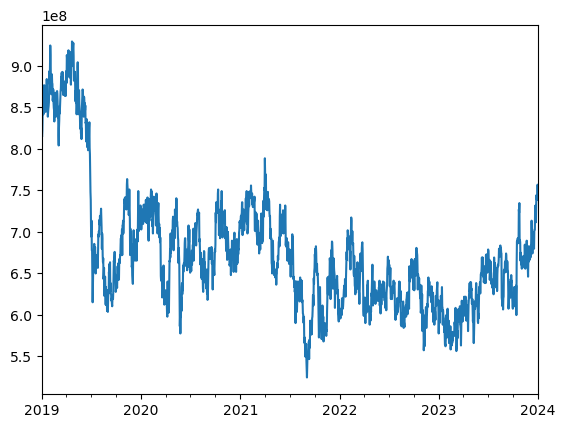

In [95]:
# ax = usbr_area.plot()
df['Area m2'].plot()

In [4]:
day0 = xr.open_dataset(datadir + first_file, decode_times=False)

In [5]:
day0

<xarray.Dataset>
Dimensions:    (lat: 7481, lon: 36001, time: 1)
Coordinates:
  * lat        (lat) float32 -37.4 -37.39 -37.38 -37.37 ... 37.38 37.39 37.4
  * lon        (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time       (time) int32 1979
Data variables:
    watermask  (lat, lon) float32 ...
Attributes: (12/35)
    id:                        PODAAC-CYGNS-L3WATERMASK32
    ShortName:                 CYGNSS_L3_UC_BERKELEY_WATERMASK_V3.2
    title:                     CYGNSS Level 3 UC Berkeley Watermask Record Ve...
    summary:                   ['CYGNSS is a NASA Earth Venture mission, mana...
    comment:                   ['This Level 3 gridded product combines all 8 ...
    program:                   CYGNSS
    ...                        ...
    date_created:              2024-07-14T09:58:23
    date_issued:               2024-07-14T09:58:23
    geospatial_lat_min:        -37.4
    geospatial_lat_max:        37.4
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        179.99

In [23]:
first_file

'cyg.ddmi.2024-01-01.l3.uc-berkeley-watermask-daily.a32.d33.nc'

In [37]:
import re
test_re = re.compile(r'[0-9]{4}-[0-9]{2}-[0-9]{2}')
codebase.utils.search_with_exception_handling(r'[0-9]{4}-[0-9]{2}-[0-9]{2}',first_file)

'2024-01-01'

## Trying out compatibility with existing functions
works with:
- load_data.load_CYGNSS_001_daily
- load_data.load_CYGNSS_001_1month
- area_calcs.CYGNSS_001_area_calculation

In [11]:
day0_subset = codebase.load_data.load_CYGNSS_001_daily(filename=first_file, bbox_vals=subset_bbox,filepath=datadir)

In [14]:
codebase.area_calcs.CYGNSS_001_area_calculation(day0_subset,with_index=False)[0]

Projected to equal area


293913870.81797975